Importing necessary libraries
1) os: The os module provides a way to interact with the operating system. In this code, it's used to handle file paths and directory operations, such as joining paths and listing directory contents.

2) numpy(np): NumPy is a fundamental library for numerical computing in Python. In this code, NumPy is used for numerical operations and array manipulations, such as loading images into arrays and preprocessing data.

3) tensorflow(tf): In this code, TensorFlow is used for loading and preprocessing images, defining the U-Net model architecture, training the model, making predictions, and evaluating model performance.

4) matplotlib.pyplot (plt): Matplotlib is a plotting library for creating static, interactive, and animated visualizations in Python.Here, it's used to plot sample images, actual masks, and predicted masks, helping us to evaluate the model's performance visually.

5) from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate: Layer classes provided by Keras for constructing the U-Net model architecture.It's used here to define the convolutional layers, pooling layers, transposed convolutional layers, and concatenation operations necessary for the U-Net's encoder-decoder structure.

6) from tensorflow.keras.models import Model: It is used to instantiate the Keras model object, here it represents the entire U-Net architecture, including its inputs, outputs, and layers.

7) train_test_split (from sklearn.model_selection):The train_test_split function from sklearn.model_selection is used in the code to split the dataset into training and validation sets. 

8) tensorflow.keras.metrics.BinaryIoU: This imports the Binary Intersection over Union (IoU) metric from the TensorFlow Keras API. IoU is a common evaluation metric for semantic segmentation tasks, measuring the overlap between predicted and ground truth masks.

In [1]:
# python version= 3.11.4
# numpy version= 1.26.4
# tensorflow version= 2.15.0
# matplotlib version= 3.8.2
# scikit-learn version= 1.4.1.post1 
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import BinaryIoU


In [2]:
# Define data paths
images_dir = os.path.join("Dataset")

The code begins by loading and preprocessing image data from the specified directories using the load_data function. Images are loaded using tf.keras.preprocessing.image.load_img and converted to arrays, while masks are loaded in grayscale mode and normalized.
The train_test_split function is then used to split the data into training and validation sets.

Approach for loading and pre-processing the data-

1) Function Definition: Defines a function named load_data that takes two arguments: images_dir and img_size.
2) Listing Filenames: Retrieves the list of filenames present in images_dir.
3) Initialization: Initializes empty lists images and masks to store loaded images and masks, respectively.
4) Iterating Over Filenames: Iterates over each filename in image_filenames.
5) Constructing Paths: Constructs the full path of the image and its corresponding mask using os.path.join.
6) Loading Images: Loads the image located at img_path and resizes it to img_size using tf.keras.preprocessing.image.load_img.
7) Converting Images to Arrays: Converts the loaded image to a NumPy array using tf.keras.preprocessing.image.img_to_array.
   Loading and Preprocessing Masks: Loads the mask located at mask_path, converts it to grayscale, resizes it to img_size, and normalizes its pixel values to be in the range [0, 1].
8) Appending Data: Appends the loaded image and mask arrays to the images and masks lists, respectively.
9) Returning Data: Converts the lists of images and masks to NumPy arrays and returns them as a tuple (images, masks).

In [3]:
# Function to load and preprocess data
def load_data(images_dir, img_size=(256, 256)):
    images = []
    masks = []
    for i in range(1,21):
        img_path = os.path.join(images_dir, "Image{:02d}.jpg".format(i))
        mask_path = os.path.join(images_dir, "Image{:02d}_label.jpg".format(i))
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        mask = tf.keras.preprocessing.image.load_img(mask_path, color_mode="grayscale", target_size=img_size)
        mask = tf.keras.preprocessing.image.img_to_array(mask) / 255.0
        images.append(img)
        masks.append(mask)
    return np.array(images), np.array(masks)

In [4]:
# Load and preprocess data
images, masks = load_data(images_dir)

In [5]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

Model Architecture (U-Net): The U-Net architecture is defined with convolutional and pooling layers for the contracting path (encoder) and up-sampling layers for the expanding path (decoder).Skip connections are added between corresponding encoder and decoder layers to preserve spatial information.
The model is compiled with the Adam optimizer, binary cross-entropy loss function, and accuracy metric.

1) Model Definition: Defines a function named unet_model that constructs the architecture of a U-Net model.

2) Input Layer: Creates an input layer with the specified input_shape.

3) Encoder Section:
Convolutional Blocks: Utilizes a series of convolutional layers (Conv2D) with increasing filter sizes (32, 64, 128, 256, 512) and ReLU activation function.Each block is followed by another convolutional layer with increasing filter size and activation function.
Max Pooling: Incorporates max-pooling layers (MaxPooling2D) after each pair of convolutional layers to downsample the feature maps.

4) Decoder Section:
Upsampling and Concatenation: Transpose convolutional layers (Conv2DTranspose) to upsample the feature maps, followed by concatenation with the corresponding feature maps from the encoder section.

Convolutional Blocks: Utilizes convolutional layers with decreasing filter sizes (256, 128, 64, 32) and ReLU activation function. Each block is followed by another convolutional layer with decreasing filter size and activation function.

5) Output Layer: Generates the final output using a convolutional layer with a single filter and sigmoid activation function.

6) Model Compilation: Constructs the model using the Model class from Keras, specifying the input and output layers.

7) Return Statement: Returns the constructed model.

In [6]:
# Define the model architecture (U-Net)
def unet_model(input_shape):
    inputs = Input(input_shape)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [7]:
# Build the model
model = unet_model(input_shape=(256, 256, 3))

These line compiles the neural network model:
Optimizer: Adam optimizer is chosen for training.
Loss Function: Binary cross-entropy is used as the loss function.
Metrics: The model will track accuracy and a custom metric mean IoU (Intersection over Union) during training.

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',BinaryIoU()])

Then, the model is trained using the training data (X_train and y_train) with validation data (X_val and y_val) for monitoring performance.Training is performed for 20 epochs with a batch size of 16.

In [95]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=16)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.0119 - accuracy: 0.9917 - binary_io_u_1: 0.9043 - val_loss: 0.0194 - val_accuracy: 0.9907 - val_binary_io_u_1: 0.8396
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 0.0119 - accuracy: 0.9917 - binary_io_u_1: 0.9052 - val_loss: 0.0202 - val_accuracy: 0.9904 - val_binary_io_u_1: 0.8351
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 0.0118 - accuracy: 0.9917 - binary_io_u_1: 0.9049 - val_loss: 0.0206 - val_accuracy: 0.9903 - val_binary_io_u_1: 0.8328
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 0.0118 - accuracy: 0.9917 - binary_io_u_1: 0.9048 - val_loss: 0.0201 - val_accuracy: 0.9904 - val_binary_io_u_1: 0.8360
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 0.0117 - accuracy: 0.9917 - binary_io_u_1: 0.9057 - val_loss: 0.0201 - val_accuracy: 0.9904 - val_binary_io_u_1: 0.8356
Epoch 6/10
1/1 [==============================] - 5s 5s

After training, the model is evaluated on the validation set to obtain loss,accuracy and Intersection over Union - IoU Evaluation Metric .
The Intersection over Union (IoU) score is calculated to measure the overlap between predicted and ground truth masks.

In [98]:
# Evaluate the model
loss, iou_score, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy:{accuracy}, Mean IOU: {iou_score}')

1/1 [==============================] - 0s 305ms/step - loss: 0.0175 - accuracy: 0.9919 - binary_io_u_1: 0.8664
Validation Loss: 0.017513293772935867, Validation Accuracy:0.8664020895957947, Mean IOU: 0.9919281005859375


Then, the trained model is used to make predictions on the entire set of images.It returns the predicted masks for each input image.

In [10]:
# Make predictions
predicted_masks = model.predict(images)

1/1 [==============================] - 3s 3s/step


Plotting predictions:
1) The code creates a set of subplots to display original images, actual masks, and predicted masks.
2) It iterates over a range of indices and displays the corresponding images and masks.
3) Each subplot consists of three images: the original image, the actual mask, and the predicted mask.
4) The tight_layout() function ensures optimal spacing between subplots.
5) Finally, plt.show() displays the entire figure with subplots.

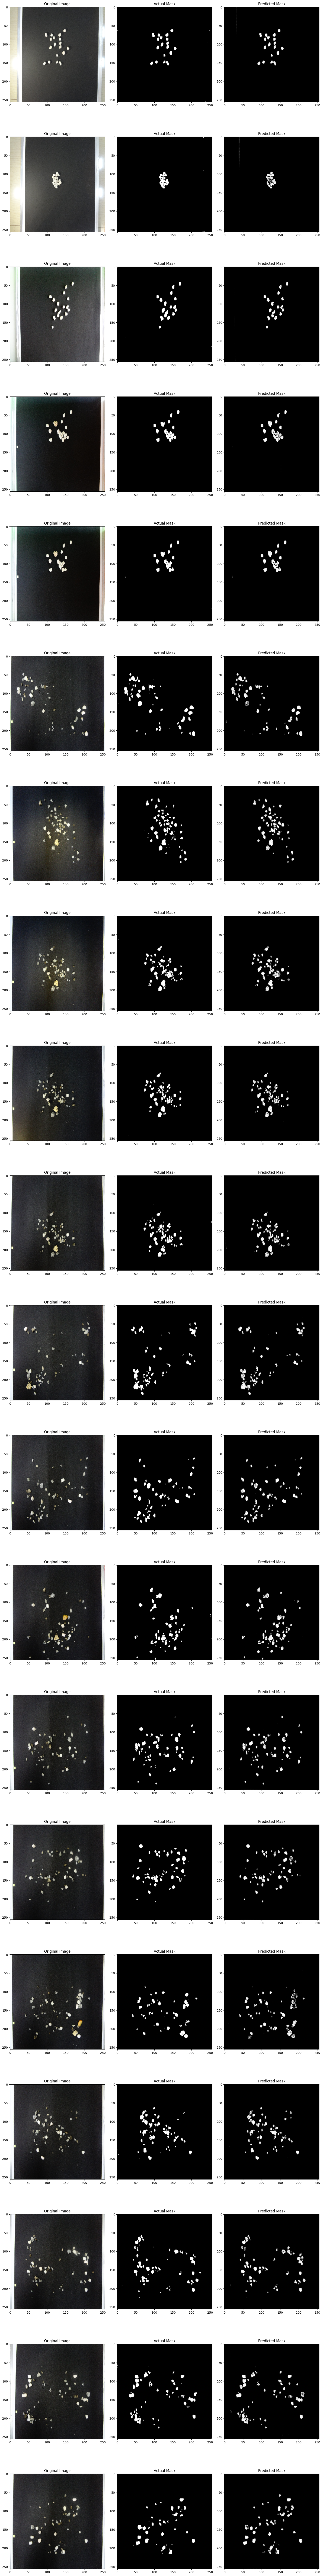

In [11]:
list1 = []
for i in range(0,20):
    list1.append(i)
# Plot predictions
num_plots = 20
sample = np.array(list1)

plt.figure(figsize=(15, 6*num_plots))
for i, idx in enumerate(sample):
    plt.subplot(num_plots, 3, 3*i + 1)
    plt.imshow(images[idx].astype('uint8'))
    plt.title('Original Image')
    
    plt.subplot(num_plots, 3, 3*i + 2)
    plt.imshow(masks[idx].squeeze(), cmap='gray')
    plt.title('Actual Mask')
    
    plt.subplot(num_plots, 3, 3*i + 3)
    plt.imshow(predicted_masks[idx].squeeze(), cmap='gray')
    plt.title('Predicted Mask')

plt.tight_layout()
plt.show()


In [83]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 256, 256, 32)         896       ['input_2[0][0]']             
                                                                                                  
 conv2d_20 (Conv2D)          (None, 256, 256, 32)         9248      ['conv2d_19[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 128, 128, 32)         0         ['conv2d_20[0][0]']           
 g2D)                                                                                       

In [110]:
model.save("model.keras")

In [9]:
model.load_weights('model.keras')